In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np
import os

from tqdm import tqdm

import severability
from severability.plotting import plot_pie_graph, plot_scan


# Multiscale severability applied to Zachary's Karate Club graph

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


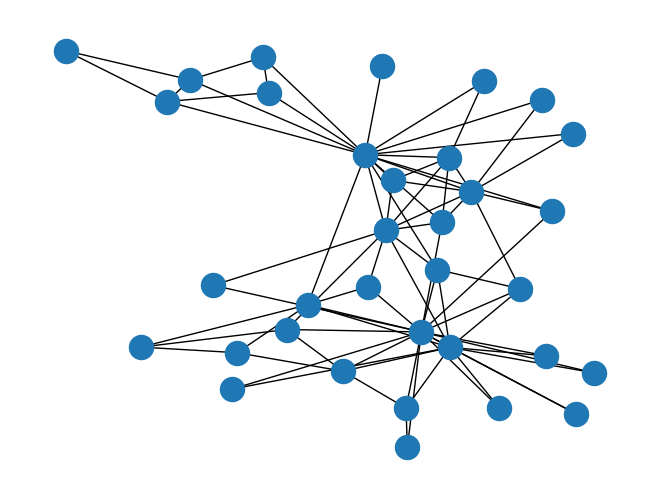

In [2]:
# get Karate Club graph
G = nx.karate_club_graph()
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(P, 20, n_tries=5, n_rand=5, n_workers=5)

Optimise severability ...


100%|███████████████████████████████████████████| 20/20 [00:08<00:00,  2.29it/s]


Compute 1-Rand(t) ...


100%|█████████████████████████████████████████| 20/20 [00:00<00:00, 1169.31it/s]

Compute 1-Rand(t,t') ...



/Users/camerontaylor/opt/anaconda3/envs/gt/lib/python3.12/site-packages/severability/optimal_scales.py:45: RuntimeWarning: Mean of empty slice
  return np.nanmean(A_w, axis=(2, 3))


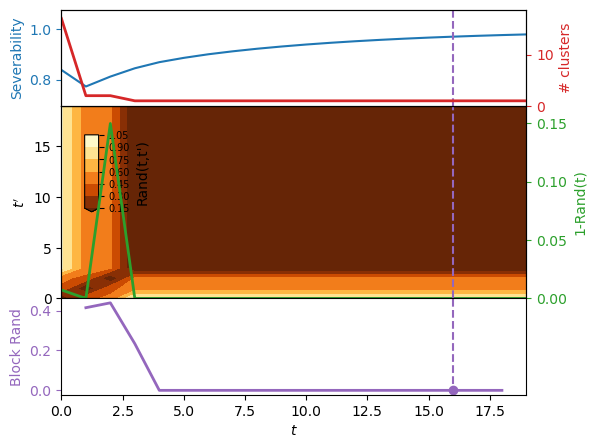

In [5]:
plot_scan(sev_results)

In [6]:
# create the pie chart graph visualisation

In [7]:
partitions = sev_results['partitions']

partition_to_plot = partitions[2]

n_nodes = len(A)

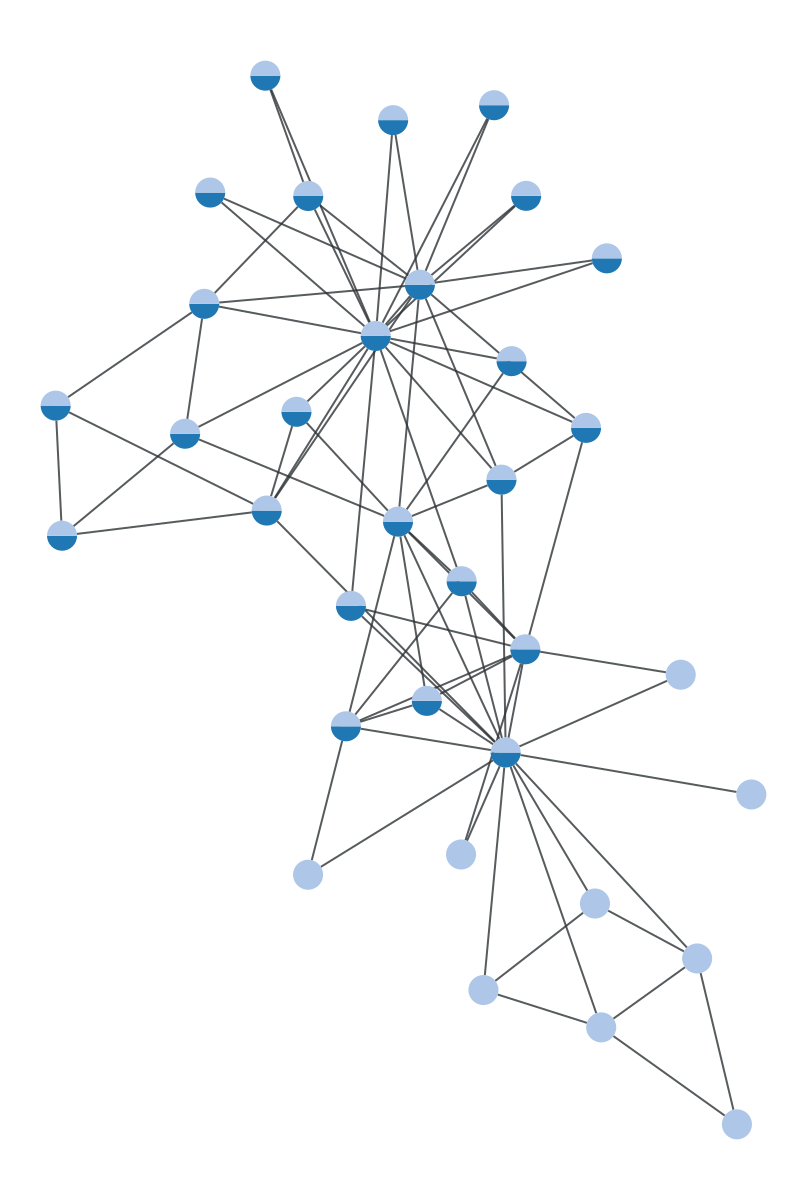

In [8]:
plot_pie_graph(partition_to_plot, A, n_nodes)